# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial

# Read in data
Data aquired from Cook Inletkeeper (https://portal.aoos.org/#metadata/56238/station/data)

In [2]:
# Removed row with units and changed headings as written below
stream_dat = pd.read_csv("stream_temp.csv")
air_dat = pd.read_csv("air_temp.csv")

stream_t = stream_dat['sea_water_temperature (deg C)']
air_t = air_dat['air_temperature (deg C)']
date = stream_dat['time (UTC)']

# Process data

In [3]:
# Compute 7-day rolling mean
x = air_t.rolling(window=168, step=168).mean()
y = stream_t.rolling(window=168, step=168).mean()

In [4]:
# Interpolate missing data
y = y.interpolate(method='linear')
x = x.interpolate(method='linear')

In [5]:
# Drop NaN value
x = x[1:]
y = y[1:]

In [6]:
# Check for null values
x.isnull().sum()

0

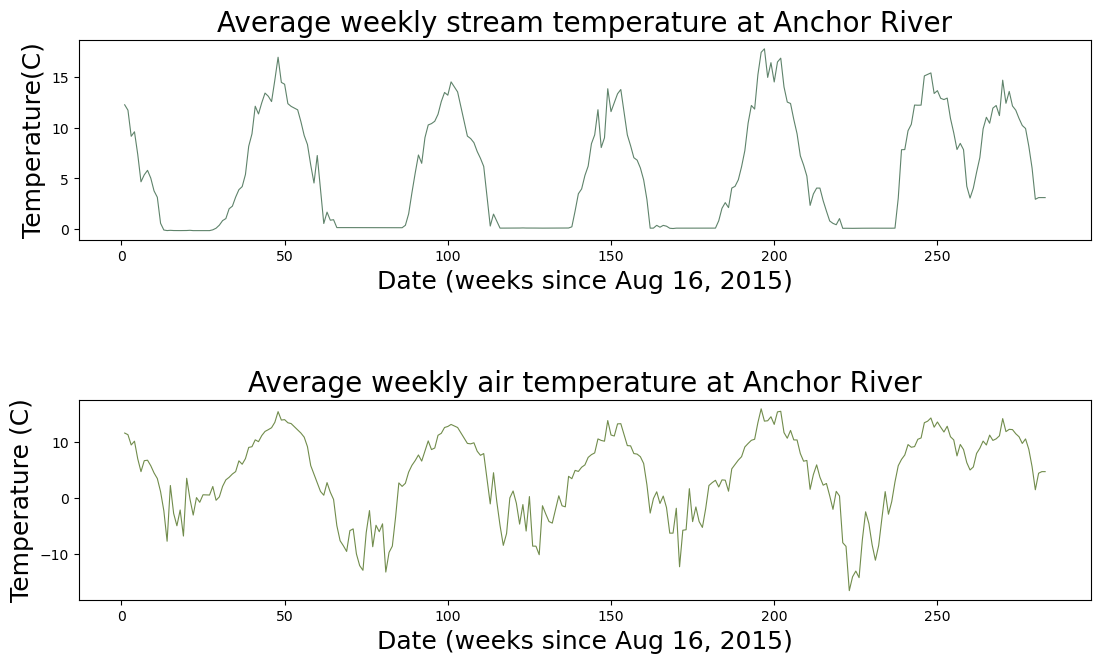

In [7]:
fig, ax = plt.subplots(2,1, figsize = (15, 7))

ticks = [0, 8400, 16800, 25200, 33600, 42000]
tick_label = ['0', '50', '100', '150', '200', '250']

ax[0].plot(y, linewidth=0.8, color='#5f836b')
ax[0].set_title("Average weekly stream temperature at Anchor River", fontsize=20)
ax[0].set_ylabel("Temperature(C)", fontsize=18)
ax[0].set_xlabel("Date (weeks since Aug 16, 2015)", fontsize=18)
ax[0].set_xticks(ticks = ticks, labels = tick_label)

ax[1].plot(x, linewidth=0.8, color='#718c4c')
ax[1].set_title("Average weekly air temperature at Anchor River", fontsize=20)
ax[1].set_xlabel("Date (weeks since Aug 16, 2015)", fontsize=18)
ax[1].set_ylabel("Temperature (C)", fontsize=18)
ax[1].set_xticks(ticks = ticks, labels = tick_label)

plt.subplots_adjust(bottom=0.2, right=0.8, top=1.0, hspace=0.8)

# Fit curves
Code from the following resource: https://www.statology.org/curve-fitting-python/

In [8]:
# Calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1-(((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [9]:
# Sort data to compute regression on stream temperatures >0.5 degrees C
x_list = list(x)
y_list = list(y)

# Strem temp >0.5 degrees C
reg_x = list()
reg_y = list()

# Stream temp <0.5 degrees C
low_air_t = list()
low_stream_t = list()

for i in range(len(y)): 
    if y_list[i] > 0.5: 
        reg_x.append(x_list[i])
        reg_y.append(y_list[i])
    else: 
        low_air_t.append(x_list[i])
        low_stream_t.append(y_list[i])

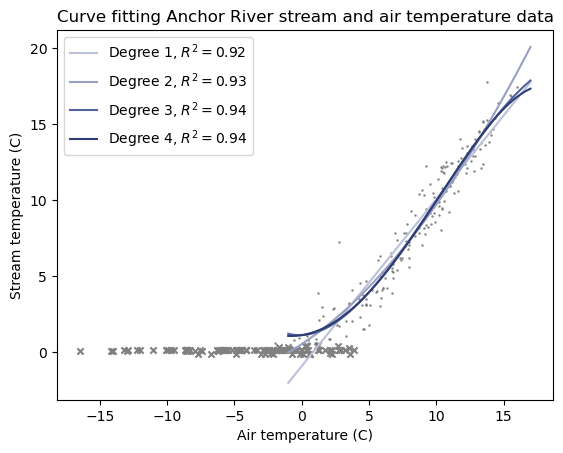

In [10]:
# Calculate models
model1 = np.poly1d(np.polyfit(reg_x, reg_y, 1))
model2 = np.poly1d(np.polyfit(reg_x, reg_y, 2))
model3 = np.poly1d(np.polyfit(reg_x, reg_y, 3))
model4 = np.poly1d(np.polyfit(reg_x, reg_y, 4))

# Create scatterplot
polyline = np.linspace(-1, 17, 10000)
plt.scatter(reg_x, reg_y, s=0.5, marker="o", color='#808080', alpha=1)
plt.scatter(low_air_t, low_stream_t, marker="x", s=20, color='#808080')

# Compute R^2 values 
rsq_1d = "%.2f" % adjR(reg_x, reg_y, 1)['r_squared']
rsq_2d = "%.2f" % adjR(reg_x, reg_y, 2)['r_squared']
rsq_3d = "%.2f" % adjR(reg_x, reg_y, 3)['r_squared']
rsq_4d = "%.2f" % adjR(reg_x, reg_y, 4)['r_squared']

# Add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='#bcc1da', label='Degree 1, $R^2 = $' + rsq_1d)
plt.plot(polyline, model2(polyline), color='#99a0c2', label='Degree 2, $R^2 = $' + rsq_2d)
plt.plot(polyline, model3(polyline), color='#54629c', label='Degree 3, $R^2 = $' + rsq_3d)
plt.plot(polyline, model4(polyline), color='#2e3d73', label='Degree 4, $R^2 = $' + rsq_4d)
plt.xlabel('Air temperature (C)')
plt.ylabel('Stream temperature (C)')
plt.title('Curve fitting Anchor River stream and air temperature data')
plt.legend()
